In [2]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
features_diet = ['FSNOTLAST',   # food did not last until family had money 2011-2018 ordinal(3)
                'FSRUNOUT',     # family worried food would run out 2011-2018 ordinal(3)
                'FSBALANC',     # family could not afford to eat balanced meals 2011-2018 ordinal(3)
                'FSATELESS',    # ∗ ate less than felt because of money 2011-2018 B
                'FSHUNGRY',     # ∗ hungry but did not eat because of money 2011-2018 B
                'FSWEIGHT',     # ∗ lost weight because of money for food 2011-2018 B
                'FSSKIP',       # ∗ family cut/skipped meals due to money 2011-2018 B
                'FSSKIPNO',     # ∗ days family cut/skipped meals because of money 2011-2018 discrete
                'FSNOTEAT',     # ∗ any family member did not eat whole day 2011-2018 B
                'FSNOTEATNO',   # ∗ days any family member did not eat 2011-2018 discrete
                'FSRAWSCORE'  # family raw score on the food security scale 2011-2018 discrete
                ]    

In [4]:
df_diet = pd.read_csv('thesis__data_res.csv', usecols = features_diet + ['MORTSTAT'])

In [5]:
# use only samples tracked for mortality status
df_diet = df_diet[(df_diet['MORTSTAT'] == 1) | (df_diet['MORTSTAT'] == 2)]

In [6]:
# first level questins (also fix universe)
df_diet = df_diet[df_diet[['FSRUNOUT', 'FSNOTLAST', 'FSBALANC']].isin([1, 2, 3]).all(axis=1)] 

# fix these features accodring to IPUMS rules 
df_diet['FSRUNOUT'] = df_diet['FSRUNOUT'].apply(lambda x: 1 if 2 <= x <= 2 else x)  
df_diet['FSRUNOUT'] = df_diet['FSRUNOUT'].apply(lambda x: 2 if x == 3 else x)       
df_diet['FSRUNOUT'] = df_diet['FSRUNOUT'].replace({1: 2, 2: 1})
df_diet['FSNOTLAST'] = df_diet['FSNOTLAST'].apply(lambda x: 1 if 2 <= x <= 2 else x)
df_diet['FSNOTLAST'] = df_diet['FSNOTLAST'].apply(lambda x: 2 if x == 3 else x)
df_diet['FSNOTLAST'] = df_diet['FSNOTLAST'].replace({1: 2, 2: 1})
df_diet['FSBALANC'] = df_diet['FSBALANC'].apply(lambda x: 1 if 2 <= x <= 2 else x)
df_diet['FSBALANC'] = df_diet['FSBALANC'].apply(lambda x: 2 if x == 3 else x)
df_diet['FSBALANC'] = df_diet['FSBALANC'].replace({1: 2, 2: 1})

# fix 'FSATELESS', 'FSHUNGRY', 'FSWEIGHT', 'FSSKIP' 
# FSATELESS
df_diet['FSATELESS'] = df_diet['FSATELESS'].apply(lambda x: 1 if 1 <= x <= 12 else x)
df_diet['FSATELESS'] = df_diet['FSATELESS'].apply(lambda x: 2 if 20 <= x <= 22 else x)
df_diet['FSATELESS'] = df_diet['FSATELESS'].apply(lambda x: 1 if x == 0 else x)
# FSHUNGRY
df_diet['FSHUNGRY'] = df_diet['FSHUNGRY'].apply(lambda x: 1 if 10 <= x <= 12 else x)
df_diet['FSHUNGRY'] = df_diet['FSHUNGRY'].apply(lambda x: 2 if 20 <= x <= 22 else x)
df_diet['FSHUNGRY'] = df_diet['FSATELESS'].apply(lambda x: 1 if x==0 else x)
# FSWEIGHT
df_diet['FSWEIGHT'] = df_diet['FSWEIGHT'].apply(lambda x: 1 if 10 <= x <= 12 else x)
df_diet['FSWEIGHT'] = df_diet['FSWEIGHT'].apply(lambda x: 2 if 20 <= x <= 22 else x)
df_diet['FSWEIGHT'] = df_diet['FSATELESS'].apply(lambda x: 1 if x==0 else x)
# FSSKIP
df_diet['FSSKIP'] = df_diet['FSSKIP'].apply(lambda x: 1 if x==0 else x)
# FSNOTEAT
df_diet['FSNOTEAT'] = df_diet['FSNOTEAT'].apply(lambda x: 1 if x==0 else x)
# remove not known
df_diet = df_diet[df_diet[['FSATELESS', 'FSHUNGRY', 'FSWEIGHT', 'FSSKIP', 'FSNOTEAT']].isin([1, 2]).all(axis=1)]


# fix FSSKIPNO
# FSSKIPNO
df_diet['FSSKIPNO'] = df_diet['FSSKIPNO'].apply(lambda x: 1 if 0 <= x < 3 else x)
df_diet['FSSKIPNO'] = df_diet['FSSKIPNO'].apply(lambda x: 2 if 3 <= x < 30 else x)
# FSNOTEATNO
df_diet['FSNOTEATNO'] = df_diet['FSNOTEATNO'].apply(lambda x: 1 if 0 <= x < 3 else x)
df_diet['FSNOTEATNO'] = df_diet['FSNOTEATNO'].apply(lambda x: 2 if 3 <= x < 30 else x)
df_diet = df_diet[df_diet[['FSSKIPNO', 'FSNOTEATNO']].isin([1, 2]).all(axis=1)]

In [7]:
# calculations for left hand side plot

# create a list to store percentages
percentage_list = []

# calculate the percentage of 2's for each column
for col in ['FSNOTLAST', 'FSRUNOUT', 'FSBALANC', 'FSATELESS', 'FSHUNGRY', 'FSWEIGHT', 'FSSKIP', 'FSNOTEAT', 'FSSKIPNO', 'FSNOTEATNO']:
    perc = df_diet[df_diet[col] == 2].shape[0] / len(df_diet)  # Percentage of 2's
    percentage_list.append(perc)

# create a DataFrame to hold these percentages for plotting
percentage_df = pd.DataFrame(percentage_list, columns=['Percentage of 2s'], index=['FSNOTLAST', 'FSRUNOUT', 'FSBALANC', 'FSATELESS', 'FSHUNGRY', 'FSWEIGHT', 'FSSKIP', 'FSSKIPNO', 'FSNOTEAT', 'FSNOTEATNO'])
percentage_df = percentage_df.reset_index()

In [8]:
# calculations for right hand side plot

# calculate the percentage of people in each category of FSRAWSCORE
category_counts = df_diet['FSRAWSCORE'].value_counts(normalize=True) * 100

# ensure the categories are ordered 
ordered_categories = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
category_counts = category_counts.reindex(ordered_categories)

# reshape the data for a heatmap (11x1)
heatmap_data = category_counts.values.reshape(-1, 1)

In [ ]:
# plotting

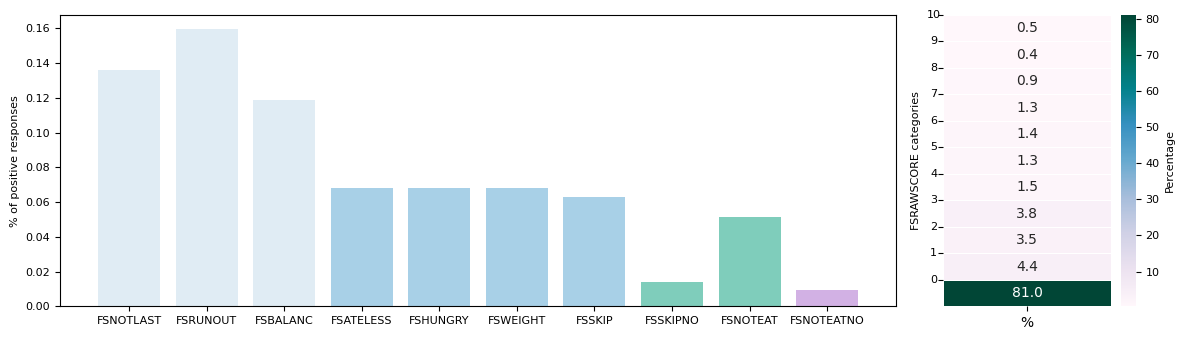

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3.5), gridspec_kw={'width_ratios': [4, 1]})  # Create two subplots side by side

color = ['#e0ecf4', '#e0ecf4', '#e0ecf4', '#a8d0e7', '#a8d0e7', '#a8d0e7', '#a8d0e7', '#7fcdbb', '#7fcdbb', '#d2b1e4']

# plot 1
bars = ax1.bar(percentage_df['index'], percentage_df['Percentage of 2s'], color=color)
ax1.set_ylabel('% of positive responses', fontsize=8)
ax1.tick_params(axis='y', labelsize=8)

# set x-ticks and labels, and center the labels
ax1.set_xticks(percentage_df['index'])
ax1.set_xticklabels(percentage_df['index'].tolist(), rotation=0, ha="center", fontsize=8)  

# plot 2
sns.heatmap(heatmap_data, annot=True, cmap='PuBuGn', cbar_kws={'label': 'Percentage'}, fmt='.1f', linewidths=0.5, ax=ax2)
ax2.set_ylabel('FSRAWSCORE categories', fontsize=8)
ax2.set_xticks([0.5])
ax2.set_xticklabels(['%'], rotation=0)
ax2.set_yticks(range(11))
ax2.set_yticklabels(category_counts.index)

# adjust color bar font size
cbar = ax2.collections[0].colorbar  
cbar.ax.tick_params(labelsize=8) 
cbar.set_label('Percentage', fontsize=8)  

# rotate y-tick labels and center them
ax2.tick_params(axis='y', labelsize=8)
plt.yticks(rotation=0, ha="center")  


plt.tight_layout()
plt.savefig('food.png', format='png')
plt.show()